# 报告简介

这份报告的目的是展示如何使用自研的 notebook 进行数据分析。我们将基于 Chinook 数据库，通过 SQL Cells 和 Python 分析工具，进行一系列的数据分析和可视化，以揭示商业洞察并支持决策制定。报告中所有数据分析均使用 SQL 查询，并结合 Pandas 和 Matplotlib 进行处理和展示。


# 数据集介绍

Chinook 数据库是一个常用的示例数据库，包含关于音乐商店的各种信息。主要的表包括：

- **customer**: 存储客户信息。
- **invoice**: 存储发票和交易信息。
- **invoice_line**: 存储每张发票的详细信息。
- **artist**: 存储艺术家信息。
- **album**: 存储专辑信息。
- **track**: 存储曲目信息。

这些表之间存在多种关联关系，例如每个发票项都关联到一个曲目，每个曲目属于一个专辑，每个专辑由一个艺术家制作等。


# 分析步骤和解释
## 示例 1：分析不同国家的销售额和客户数量
我们首先通过 SQL 查询来统计每个国家的客户数量和总销售额。这个查询将返回每个国家的独立客户数，以及这些客户在该地区所产生的总销售额。

In [2]:
%%sql 
{"result_variable":"country_sale","db_id":"postgresql: chinook","sql_script":"SELECT \n    c.country AS country, \n    COUNT(DISTINCT c.customer_id) AS customer_count, \n    SUM(i.total) AS total_sales\nFROM \n    customer c\nJOIN \n    invoice i ON c.customer_id = i.customer_id\nGROUP BY \n    c.country\nORDER BY \n    total_sales DESC;\n"}

,country,customer_count,total_sales
0,USA,13,523.06
1,Canada,8,303.96
2,France,5,195.10
3,Brazil,5,190.10
4,Germany,4,156.48
5,United Kingdom,3,112.86
6,Czech Republic,2,90.24
7,Portugal,2,77.24
8,India,2,75.26
9,Chile,1,46.62


通过这张图表，我们能够轻松地看到不同国家的市场表现，比如客户数量与销售额的关系。这样一来，业务团队可以更好地判断市场拓展的优先级。

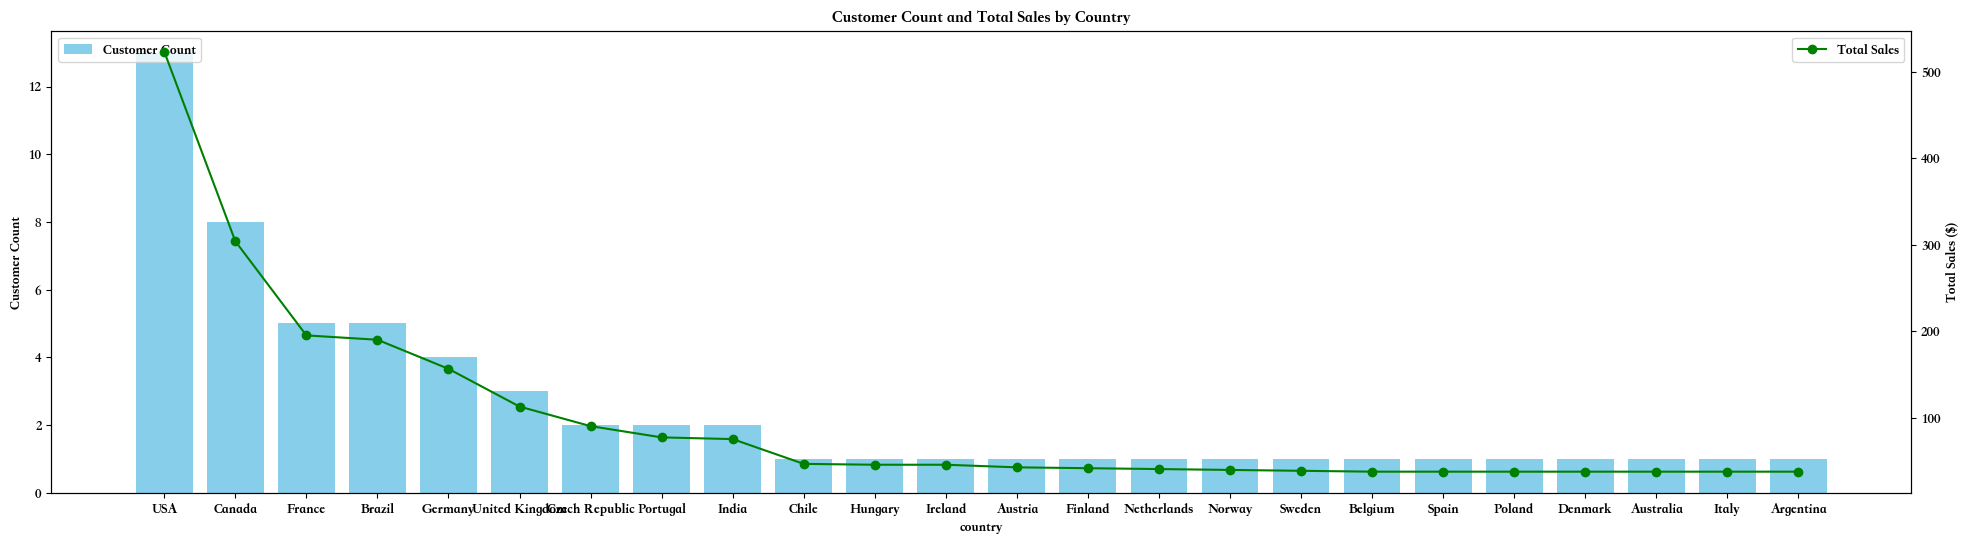

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(24, 6))
ax1.bar(country_sale['country'], country_sale['customer_count'], color='skyblue', label='Customer Count')
ax1.set_xlabel('country')
ax1.set_ylabel('Customer Count')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(country_sale['country'], country_sale['total_sales'], color='green', marker='o', label='Total Sales')
ax2.set_ylabel('Total Sales ($)')
ax2.legend(loc='upper right')
plt.title('Customer Count and Total Sales by Country')
plt.show()


## 示例 2：热门艺术家和专辑分析
接下来，我们通过 SQL 查询来分析最受欢迎的艺术家及其专辑。这个查询将统计每个艺术家的专辑销量总额，并列出销售额前十的专辑。

In [4]:
%%sql 
{"result_variable":"artist_album","db_id":"postgresql: chinook","sql_script":"SELECT \n    ar.name AS Artist, \n    al.title AS Album, \n    SUM(il.unit_price * il.quantity) AS album_sales\nFROM \n    artist ar\nJOIN \n    album al ON ar.artist_id = al.artist_id\nJOIN \n    track t ON al.album_id = t.album_id\nJOIN \n    invoice_line il ON t.track_id = il.track_id\nGROUP BY \n    ar.name, al.title\nORDER BY \n    album_sales DESC\nLIMIT 10;\n"}

,artist,album,album_sales
0,Battlestar Galactica (Classic),"Battlestar Galactica (Classic), Season 1",35.82
1,The Office,"The Office, Season 3",31.84
2,Chico Buarque,Minha Historia,26.73
3,Lost,"Lost, Season 2",25.87
4,Heroes,"Heroes, Season 1",25.87
5,Lenny Kravitz,Greatest Hits,25.74
6,Eric Clapton,Unplugged,24.75
7,Battlestar Galactica,"Battlestar Galactica, Season 3",23.88
8,Lost,"Lost, Season 3",21.89
9,Titãs,Acústico,21.78


从图中，我们可以清晰地看到哪些专辑的销售量最大，并帮助我们识别市场上最受欢迎的艺术家和作品。

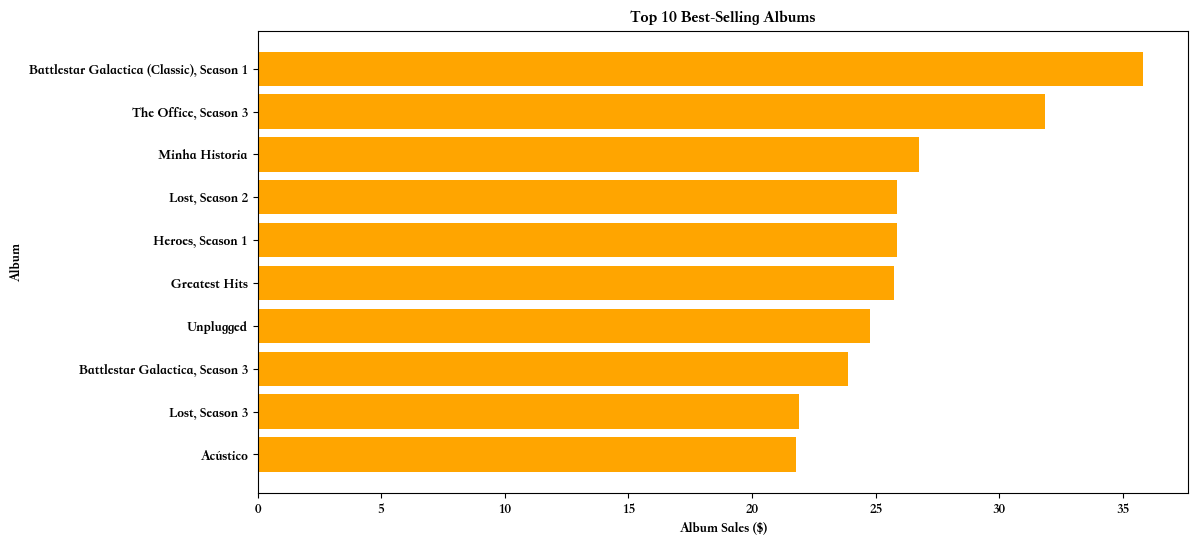

In [5]:
plt.figure(figsize=(12, 6))
plt.barh(artist_album['album'], artist_album['album_sales'], color='orange')
plt.xlabel('Album Sales ($)')
plt.ylabel('Album')
plt.title('Top 10 Best-Selling Albums')
plt.gca().invert_yaxis()
plt.show()


## 示例 3：月度销售趋势分析
最后，我们将分析每个月的销售额变化情况，以识别销售的季节性趋势。

In [6]:
%%sql 
{"result_variable":"monthly_sales","db_id":"postgresql: chinook","sql_script":"SELECT \n    TO_CHAR(i.invoice_date, 'YYYY-MM') AS Month, \n    SUM(i.total) AS monthly_sales\nFROM \n    invoice i\nGROUP BY \n    Month\nORDER BY \n    Month;\n"}

,month,monthly_sales
0,2021-01,35.64
1,2021-02,37.62
2,2021-03,37.62
3,2021-04,37.62
4,2021-05,37.62
5,2021-06,37.62
6,2021-07,37.62
7,2021-08,37.62
8,2021-09,37.62
9,2021-10,37.62


通过查看月度销售趋势，我们可以更好地了解销售额在不同月份的波动情况，为库存管理和市场活动提供更可靠的依据。

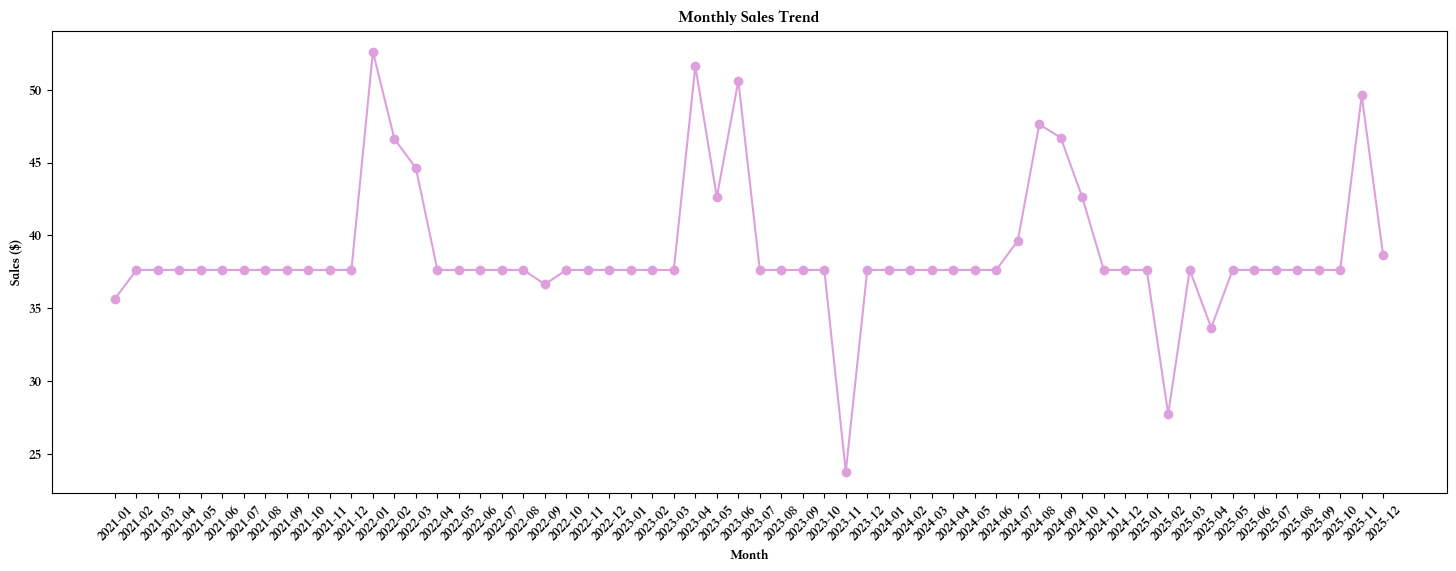

In [7]:
plt.figure(figsize=(18, 6))
plt.plot(monthly_sales['month'], monthly_sales['monthly_sales'], marker='o', linestyle='-', color='plum')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()



# 结果和结论
总结每个分析的关键发现，并讨论其商业意义。

通过对 Chinook 数据库的分析，我们发现了一些重要的商业洞察：

1. **不同国家的市场表现**：
   - 美国和加拿大的客户数量和销售额明显高于其他国家，表明这些市场具有更高的客户参与度和销售潜力。
   - 对于销售额较低的国家，可以考虑增加市场推广力度以提高销售。

2. **热门艺术家和专辑**：
   - 某些艺术家和专辑的销量显著高于其他，这表明这些作品在市场上非常受欢迎。
   - 可以针对这些热门艺术家和专辑进行更多的推广活动，以进一步增加销售额。

3. **月度销售趋势**：
   - 销售额在每个月份之间存在显著波动，可能受季节性影响较大。
   - 通过识别销售高峰和低谷，公司可以更好地制定季节性营销策略和库存管理计划。

这些发现为我们优化市场策略、资源分配和销售预测提供了数据支持，帮助公司在激烈的市场竞争中取得更大的成功。
